In [2]:
%matplotlib inline

In [87]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [88]:
cars = pd.read_csv("Cars/autoscout24-germany-dataset.csv")

In [89]:
cars.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


In [90]:
cars[(cars["make"] == "BMW")].groupby("model").size().sort_values(ascending=False).head(10)

model
320    252
116    225
X1     202
118    174
520    166
318    147
530    123
X3     121
218     75
120     60
dtype: int64

In [91]:
bmw_320 = cars[(cars["model"] == "320")]

In [92]:
bmw_320.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
39,214000,BMW,320,Diesel,Automatic,Used,8199,184.0,2012
174,27500,BMW,320,Diesel,Automatic,Used,30675,190.0,2019
253,261000,BMW,320,Diesel,Automatic,Used,8000,184.0,2012
486,147000,BMW,320,Diesel,Manual,Used,13999,190.0,2016
819,110998,BMW,320,Gasoline,Manual,Used,7999,170.0,2011


sns.heatmap(bmw_320)

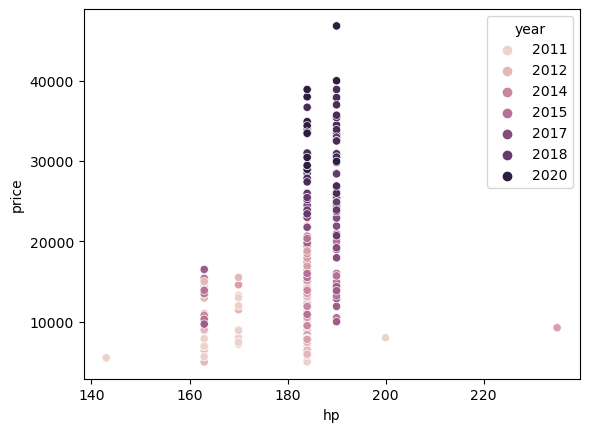

In [93]:
sns.scatterplot(x = "hp",
                y = "price",
                hue = 'year',
                data = bmw_320)
plt.show()

In [94]:
bmw_320.groupby(bmw_320["gear"]).size().sort_values(ascending=False)

gear
Automatic    166
Manual        85
dtype: int64

In [95]:
bmw_320.groupby(bmw_320["fuel"]).size().sort_values(ascending=False)

fuel
Diesel        190
Gasoline       60
-/- (Fuel)      1
Others          1
dtype: int64

In [96]:
idx_to_remove = bmw_320[(bmw_320["fuel"] != "Diesel") & (bmw_320["fuel"] != 'Gasoline')].index

In [97]:
bmw_320.drop(idx_to_remove , inplace=True)

/tmp/ipykernel_9565/2894526827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bmw_320 = bmw_320.drop(idx_to_remove , inplace=True).copy()


AttributeError: 'NoneType' object has no attribute 'copy'

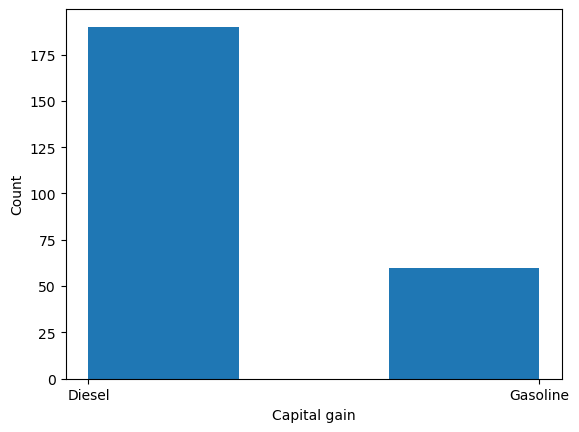

In [98]:
plt.hist(bmw_320["fuel"],bins = 3)
plt.xlabel("Capital gain")
plt.ylabel("Count")
plt.show()

In [99]:
bmw_320[(bmw_320["fuel"] != "Diesel") & (bmw_320["fuel"] != 'Gasoline')]

,mileage,make,model,fuel,gear,offerType,price,hp,year


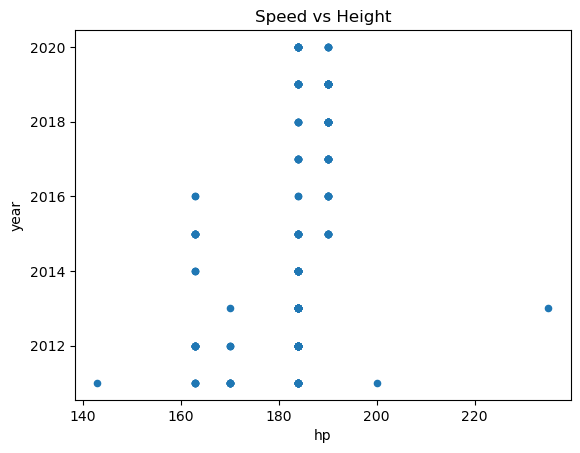

In [101]:
bmw_320.plot(kind = "scatter",
            x = "hp",
            y = "year",
            title = "Speed vs Height")
plt.show()

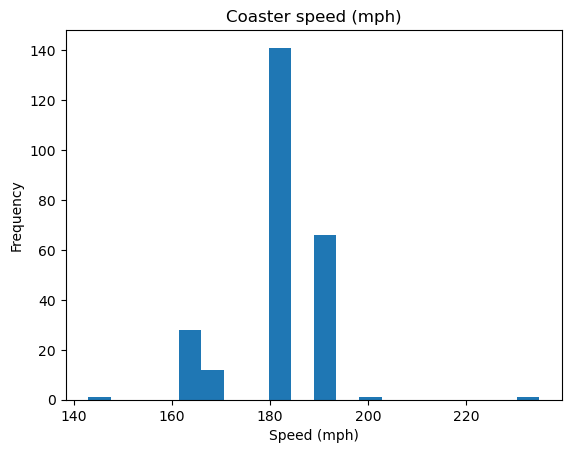

In [102]:
#Check the speed distribution with histogram
ax = bmw_320["hp"].plot(kind="hist",
                         bins = 20,
                         title = "Coaster speed (mph)")
ax.set_xlabel("Speed (mph)")
plt.show()

In [103]:
vw = cars[(cars["make"] == "Volkswagen")]

In [104]:
vw

,mileage,make,model,fuel,gear,offerType,price,hp,year
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
11,84000,Volkswagen,Golf,Gasoline,Manual,Used,6990,105.0,2011
15,72000,Volkswagen,Polo,Gasoline,Manual,Used,6999,60.0,2011
21,81970,Volkswagen,Golf,Gasoline,Manual,Used,7850,105.0,2012
23,193333,Volkswagen,Cross Touran,Diesel,Manual,Used,7900,105.0,2012
...,...,...,...,...,...,...,...,...,...
46328,5800,Volkswagen,T6 Multivan,Diesel,Automatic,Demonstration,77470,204.0,2021
46336,50,Volkswagen,T-Cross,Gasoline,Automatic,Pre-registered,23990,110.0,2021
46366,50,Volkswagen,Passat Variant,Gasoline,Automatic,Pre-registered,31450,150.0,2021
46377,100,Volkswagen,Golf,Diesel,Automatic,Pre-registered,32490,150.0,2021


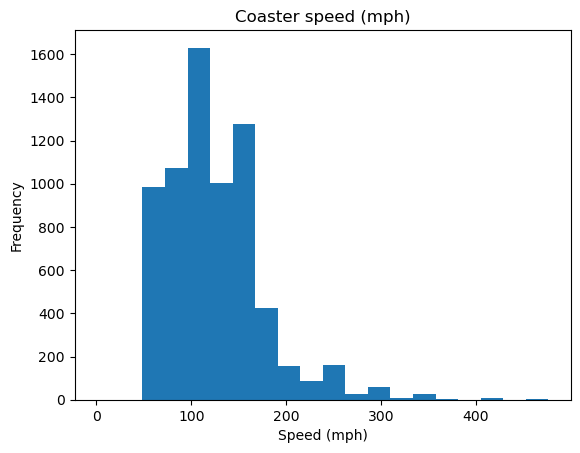

In [105]:
ax = vw["hp"].plot(kind="hist",
                         bins = 20,
                         title = "Coaster speed (mph)")
ax.set_xlabel("Speed (mph)")
plt.show()

In [109]:
merc = cars[(cars["make"] == "Mercedes-Benz")]

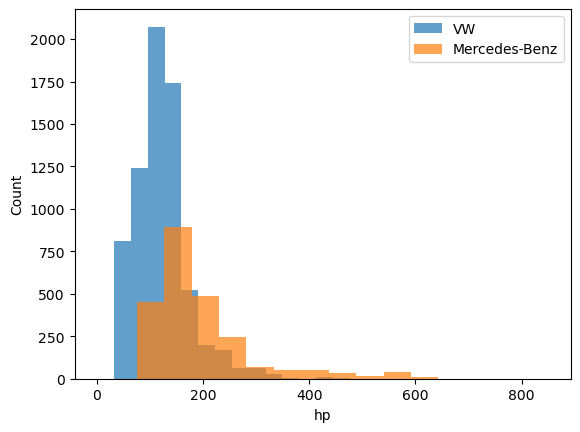

In [114]:
# plt.hist(bmw_320["hp"], bins = 15, label = "BMW", alpha = 0.7)
plt.hist(vw["hp"], bins = 15, label = "VW", alpha = 0.7)
plt.hist(merc["hp"], bins = 15, label = "Mercedes-Benz", alpha = 0.7)
plt.legend()
plt.xlabel("hp")
plt.ylabel("Count")
plt.show()

In [108]:
cars["make"].unique()

array(['BMW', 'Volkswagen', 'SEAT', 'Renault', 'Peugeot', 'Toyota',
       'Opel', 'Mazda', 'Ford', 'Mercedes-Benz', 'Chevrolet', 'Audi',
       'Fiat', 'Kia', 'Dacia', 'MINI', 'Hyundai', 'Skoda', 'Citroen',
       'Infiniti', 'Suzuki', 'SsangYong', 'smart', 'Cupra', 'Volvo',
       'Jaguar', 'Porsche', 'Nissan', 'Honda', 'Lada', 'Mitsubishi',
       'Others', 'Lexus', 'Jeep', 'Maserati', 'Bentley', 'Land', 'Alfa',
       'Subaru', 'Dodge', 'Microcar', 'Lamborghini', 'Baic', 'Tesla',
       'Chrysler', '9ff', 'McLaren', 'Aston', 'Rolls-Royce', 'Alpine',
       'Lancia', 'Abarth', 'DS', 'Daihatsu', 'Ligier', 'Ferrari',
       'Caravans-Wohnm', 'Aixam', 'Piaggio', 'Zhidou', 'Morgan',
       'Maybach', 'Tazzari', 'Trucks-Lkw', 'RAM', 'Iveco', 'DAF',
       'Alpina', 'Polestar', 'Brilliance', 'FISKER', 'Cadillac',
       'Trailer-Anhänger', 'Isuzu', 'Corvette', 'DFSK', 'Estrima'],
      dtype=object)